<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np


## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

In [32]:
#para não aparecer msg's de erros (bbt desatualizadas...)

import warnings
warnings.filterwarnings('ignore') ## ou warnings.filterwarnings(action='once') vc vê o erro apenas um vez, depois ele ignora

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [33]:
dados = pd.read_csv(r'C:\Users\LMMARTINHO\Documents\Courses\Statistics\Parte 5 - Regressão Linear\Dados\Consumo_cerveja.csv', sep=';')

## Visualizar os dados

In [34]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Verificando o tamanho do dataset

In [35]:
dados.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [36]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [37]:
dados.dtypes

data              str
temp_media    float64
temp_min      float64
temp_max      float64
chuva         float64
fds             int64
consumo         int64
dtype: object

In [38]:
dados['data'] = pd.to_datetime(dados['data'], dayfirst = True)

In [39]:
dados.dtypes

data          datetime64[us]
temp_media           float64
temp_min             float64
temp_max             float64
chuva                float64
fds                    int64
consumo                int64
dtype: object

In [40]:
dados.corr().round(4)

## Aqui, conseguimos ver que para a variável dependente (consumo), a temperatura max, a chuva e o fds incluenciam bem o consumo. São variaveis que sao interessantes de levar 
## para o modelo.
# Escolhi a temperatura máxima pois ela tem a maior correlação. Não trago ela junto com a temp media e a temp minima, pois elas tem muita correlação entre elas (0,922 e 0,67),
## e isso poderia gerar problemas para o modelo (trazer duas variaveis explicativas com alta correlação entre elas)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
data,1.0000,-0.0986,-0.1701,-0.0689,0.0075,-0.0060,0.0435
temp_media,-0.0986,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,-0.1701,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,-0.0689,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0075,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0060,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.0435,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

Text(0, 0.5, 'Litros')

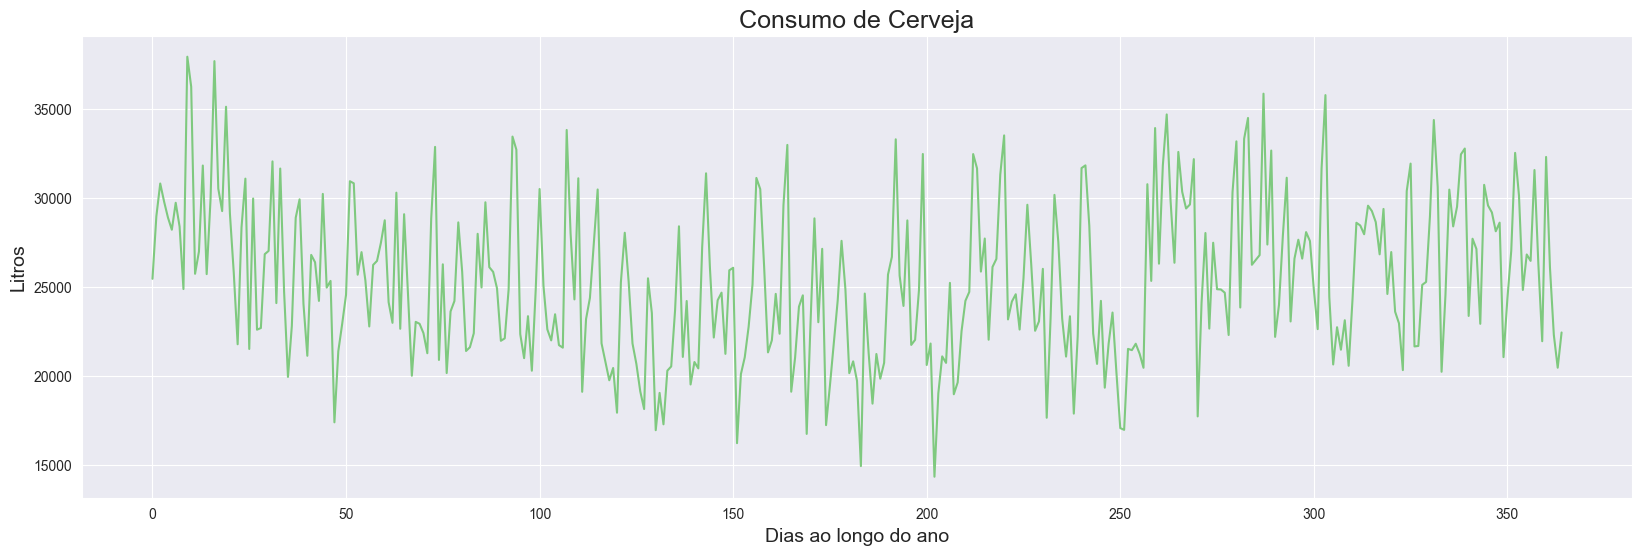

In [41]:
fig, ax = plt.subplots(figsize = (20,6))

ax = dados['consumo'].plot()
ax.set_title('Consumo de Cerveja', fontsize = 18)
ax.set_xlabel('Dias ao longo do ano', fontsize = 14)
ax.set_ylabel('Litros', fontsize = 14)

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [42]:
import seaborn as sns

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0.5, 1.0, 'BoxPlot Consumo Cerveja')

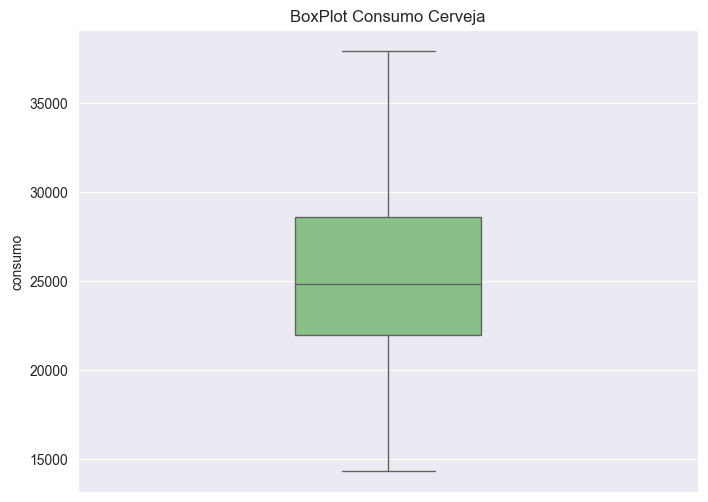

In [43]:
ax = sns.boxplot(data = dados['consumo'],
            orient= 'v',
            width=0.3)
ax.figure.set_size_inches(8,6)
ax.set_title('BoxPlot Consumo Cerveja')

## Não há variáveis discrepantes do consumo de cerveja.

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

Text(0, 0.5, 'Consumo (L)')

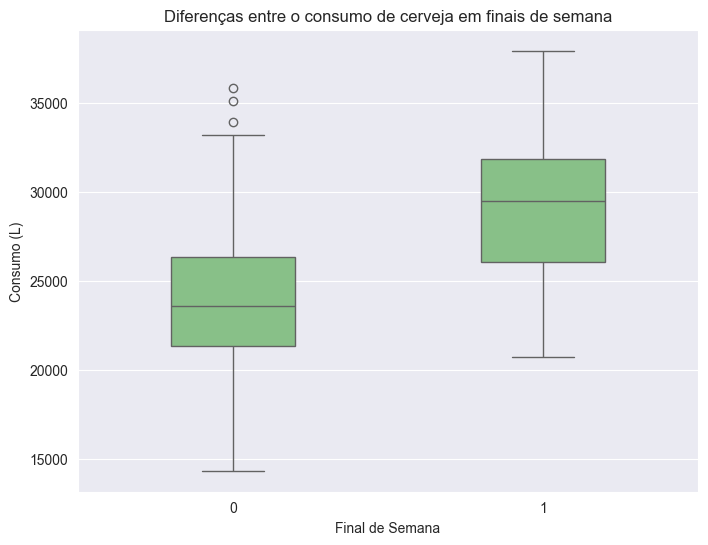

In [44]:
ax = sns.boxplot(
            data=dados,
            y = 'consumo',
            x = 'fds',
            orient='v',
            width=0.4
)
ax.figure.set_size_inches(8,6)
ax.set_title('Diferenças entre o consumo de cerveja em finais de semana')
ax.set_xlabel('Final de Semana')
ax.set_ylabel('Consumo (L)')
## Os outliers em dias de não fim de semana podem ser relativos aos dias de feriado.
## Visivelmente podemos ver as diferenças de consumo entre os dias que tem fds e não.

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [45]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

Text(0, 0.5, 'Consumo (L)')

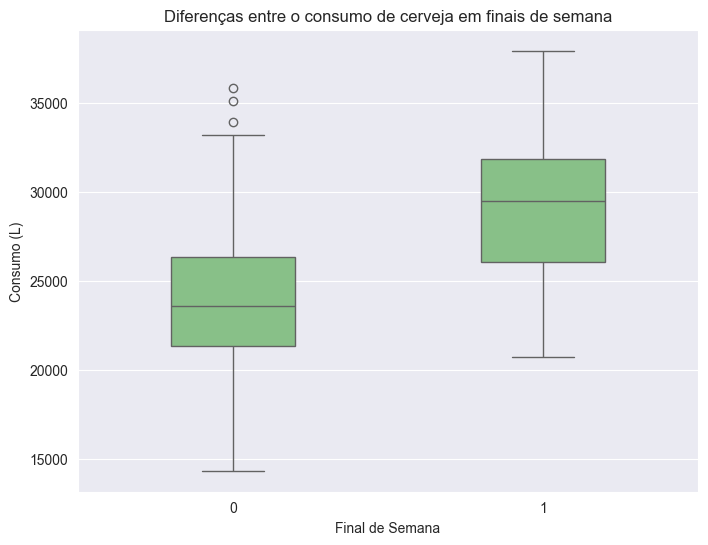

In [46]:
ax = sns.boxplot(
            data=dados,
            y = 'consumo',
            x = 'fds',
            orient='v',
            width=0.4
)
ax.figure.set_size_inches(8,6)
ax.set_title('Diferenças entre o consumo de cerveja em finais de semana')
ax.set_xlabel('Final de Semana')
ax.set_ylabel('Consumo (L)')

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<Axes: xlabel='consumo', ylabel='Density'>

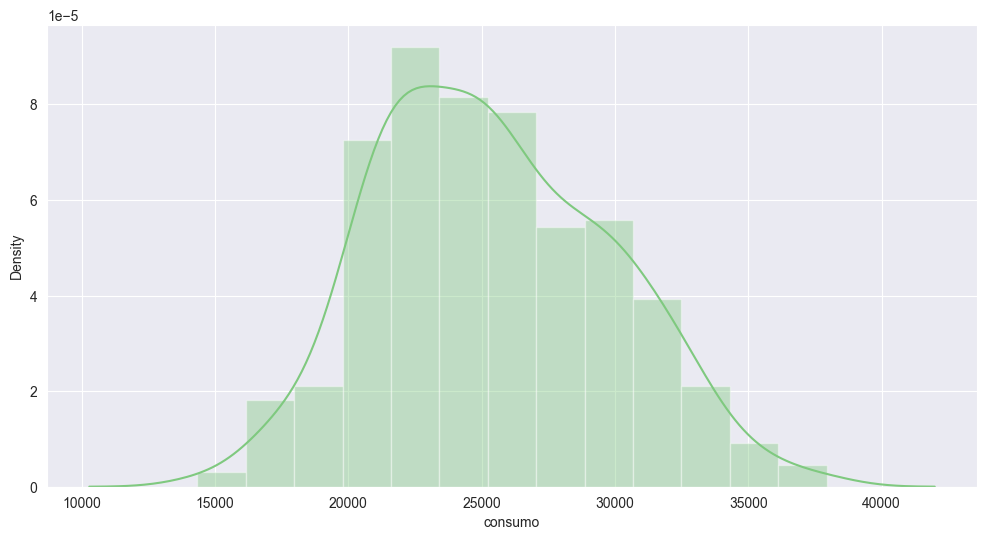

In [51]:
## Modelos de regressão linear assumem que a variável dependente segue uma distribuição normal.

ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12,6)
ax

## Aqui vamos assumir que é uma normal. Mas se não for, necessário adaptar a variável para que seja normal (transformações ou 
## aumentando o numero de n)

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

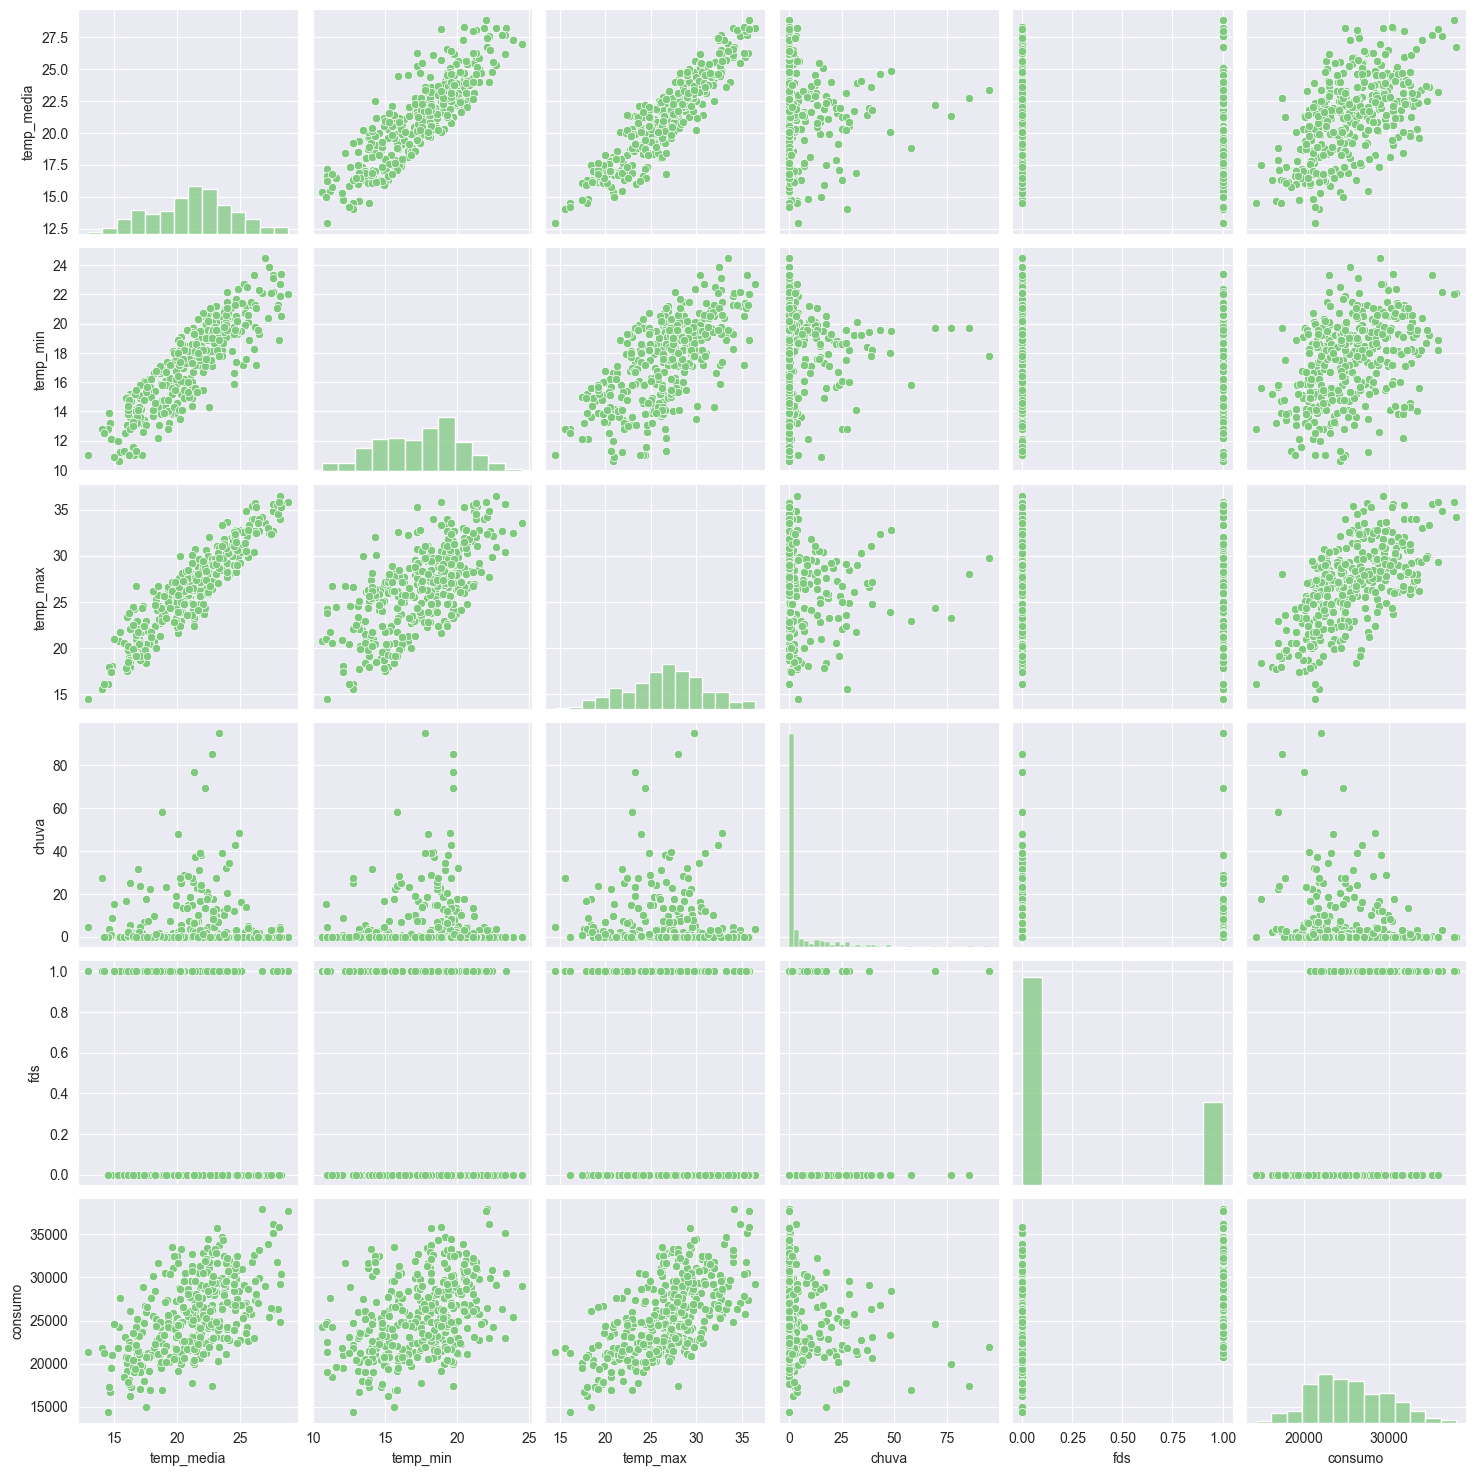

In [52]:
ax = sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

Text(0.5, 1.1, 'Dispersão entre variáveis')

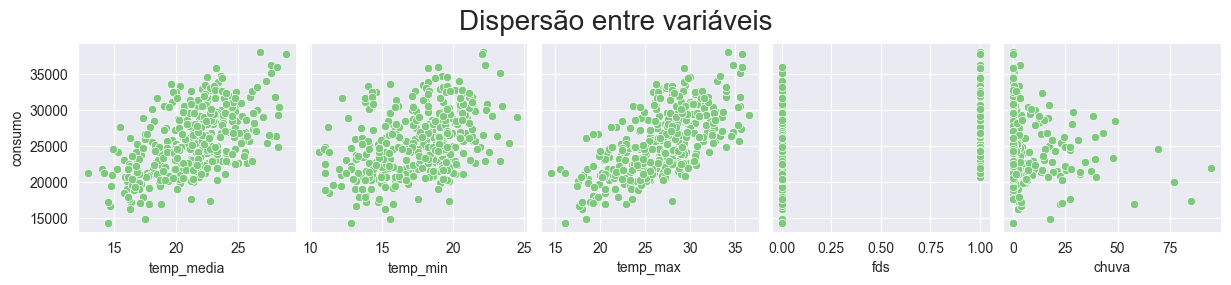

In [53]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_media','temp_min','temp_max','fds','chuva'])
ax.fig.suptitle('Dispersão entre variáveis', fontsize = 20, y = 1.1)

Text(0.5, 1.1, 'Dispersão entre variáveis')

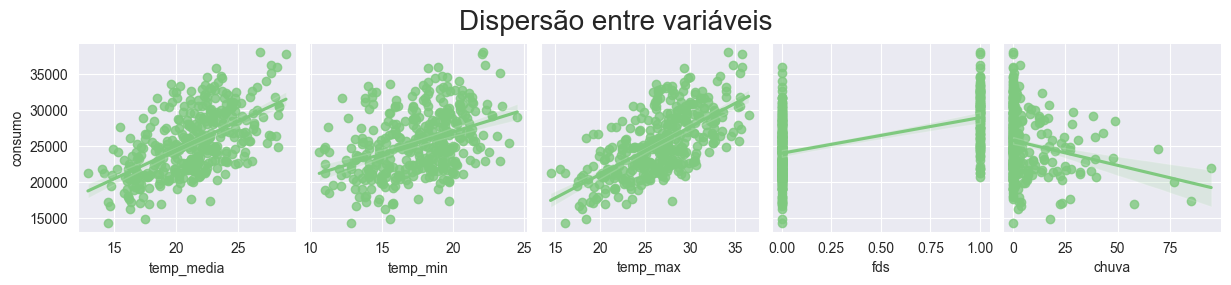

In [54]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_media','temp_min','temp_max','fds','chuva'], kind = 'reg')
ax.fig.suptitle('Dispersão entre variáveis', fontsize = 20, y = 1.1)

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

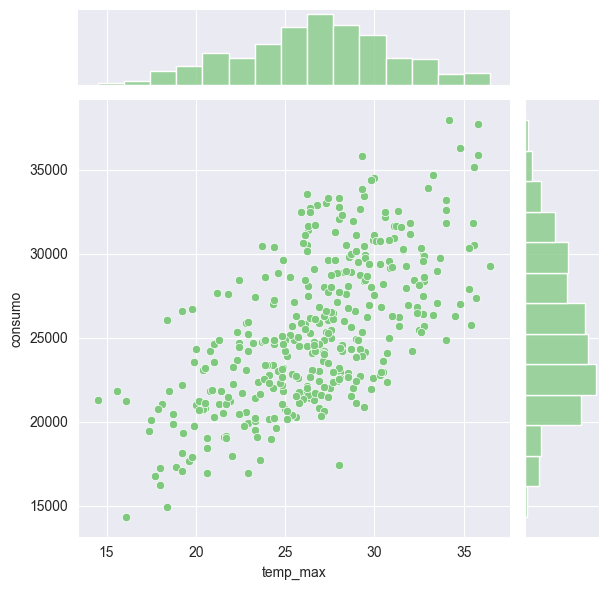

In [55]:
ax = sns.jointplot(x= 'temp_max', y='consumo', data=dados)

## Plotando um jointplot com a reta de regressão estimada

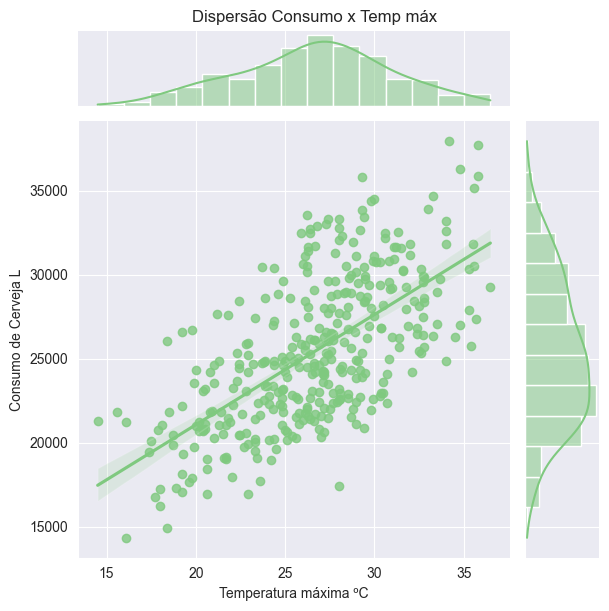

In [56]:
ax = sns.jointplot(x= 'temp_max', y='consumo', data=dados, kind='reg')
ax.fig.suptitle('Dispersão Consumo x Temp máx', y = 1.01)
ax.set_axis_labels('Temperatura máxima ºC', 'Consumo de Cerveja L')

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

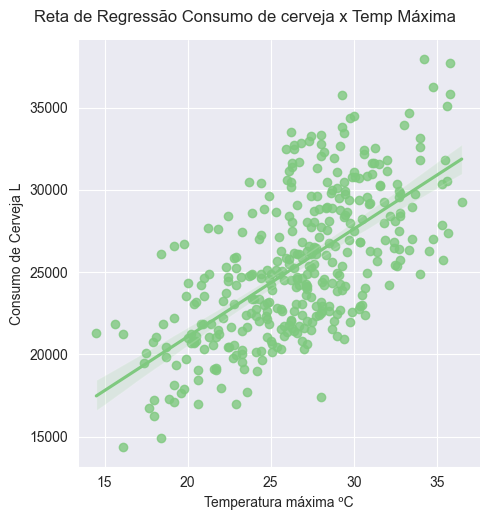

In [57]:
ax = sns.lmplot(x='temp_max', y = 'consumo', data=dados)
ax.fig.suptitle('Reta de Regressão Consumo de cerveja x Temp Máxima', y = 1.03)
ax.set_xlabels('Temperatura máxima ºC')
ax.set_ylabels('Consumo de Cerveja L')

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

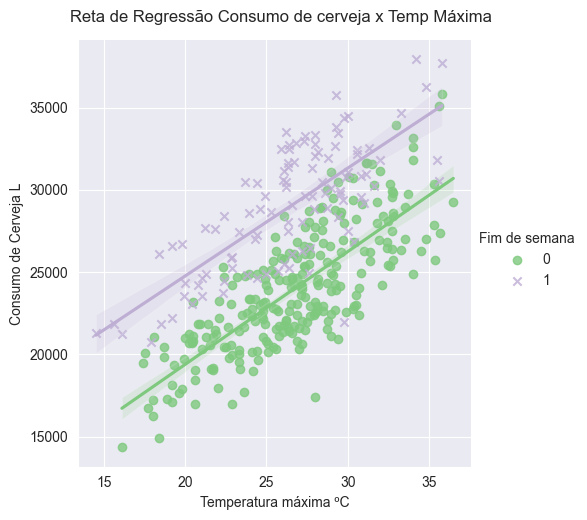

In [58]:
ax = sns.lmplot(x='temp_max', y = 'consumo', data=dados, hue = 'fds', markers=['o','x'], legend=False)
ax.fig.suptitle('Reta de Regressão Consumo de cerveja x Temp Máxima', y = 1.03)
ax.set_xlabels('Temperatura máxima ºC')
ax.set_ylabels('Consumo de Cerveja L')
ax.add_legend(title='Fim de semana')

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

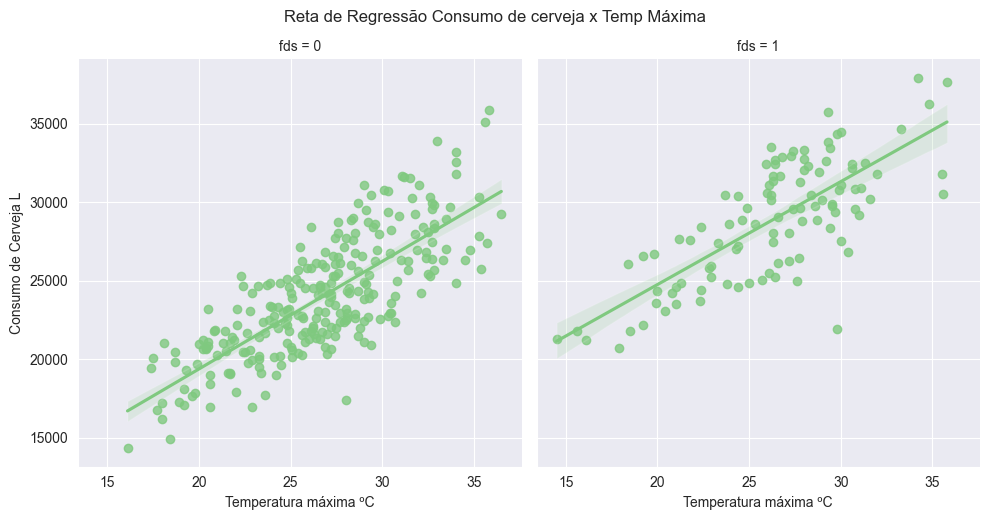

In [59]:
ax = sns.lmplot(x='temp_max', y = 'consumo', data=dados, col = 'fds')
ax.fig.suptitle('Reta de Regressão Consumo de cerveja x Temp Máxima', y = 1.03)
ax.set_xlabels('Temperatura máxima ºC')
ax.set_ylabels('Consumo de Cerveja L')

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [60]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [61]:
y = dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [62]:
X = dados[['temp_max','chuva','fds']]

## Criando os datasets de treino e de teste

In [63]:
## teste size é o percentual dos registros que são separados para testse
## random state é apenas para ser o mesmo conjunto de registros que o professor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [64]:
X_train.shape

(255, 3)

In [65]:
X_test.shape

(110, 3)

In [66]:
X_train.shape[0] + X_test.shape[0]

365

In [67]:
X.shape[0] * 0.3 ## jogou os 30% para o teste

109.5

<img width='600px' src='../Dados/img/reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [69]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [70]:
modelo.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [71]:
print('R²:', format(modelo.score(X_train,y_train)))

R²: 0.7336167014928967


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [72]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [73]:
metrics.r2_score(y_test,y_previsto)

0.690736466775069

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [74]:
X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [75]:
modelo.predict(X_test[0:1])[0]

np.float64(26094.901775262017)

## Criando um simulador simples

In [76]:
temp_max = 40
chuva = 0
fds = 1
entrada = [[temp_max,chuva,fds]]

print('O consumo em L será de {0:.2f}' .format(modelo.predict(entrada)[0]))

O consumo em L será de 38742.53


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='../Dados/img/reg_02.jpg'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [77]:
modelo.intercept_

np.float64(5951.9763393124485)

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [78]:
modelo.coef_
## Vem na ordem que as variáveis explicativas entraram no modelo (temp, chuva, fds)

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [79]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [80]:
X_test.columns

Index(['temp_max', 'chuva', 'fds'], dtype='str')

## Criando uma lista com os nomes das variáveis do modelo

In [81]:
index = ['Intercept', 'Temperatura_Máxima', 'Chuva (mm)', 'Fim de semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [82]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_),
             index = index,
             columns=['Parâmetros'])

,Parâmetros
Intercept,5951.976339
Temperatura_Máxima,684.736759
Chuva (mm),-60.782435
Fim de semana,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [83]:
y_previstro_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

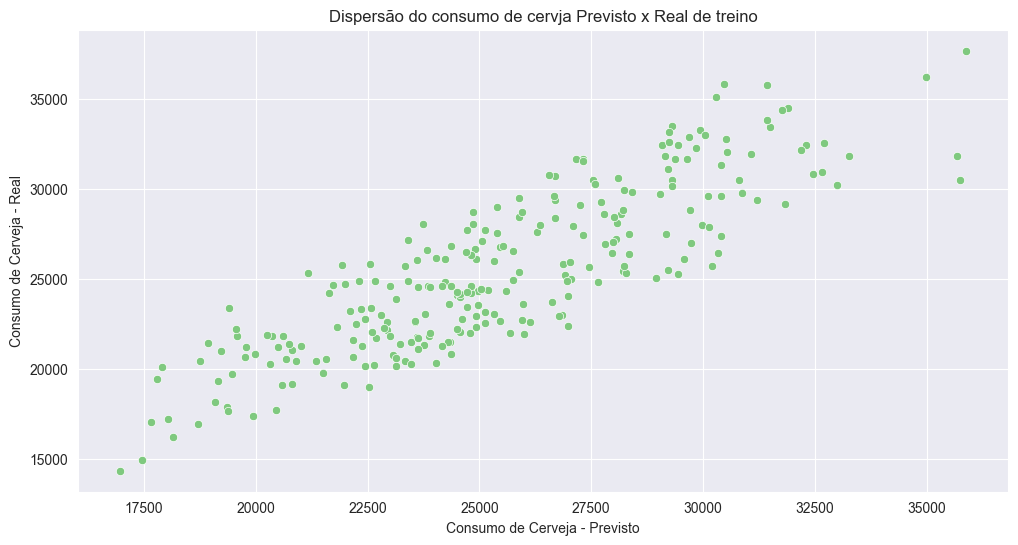

In [84]:
ax = sns.scatterplot(x=y_previstro_train, y = y_train)
ax.set_xlabel('Consumo de Cerveja - Previsto')
ax.set_ylabel('Consumo de Cerveja - Real')
ax.set_title('Dispersão do consumo de cervja Previsto x Real de treino')
ax.figure.set_size_inches(12,6)

## Aqui percebe-se que para valores maior de consumo, a previsão se afasta do real...

## Obtendo os resíduos

In [85]:
resíduos = y_previstro_train - y_train

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

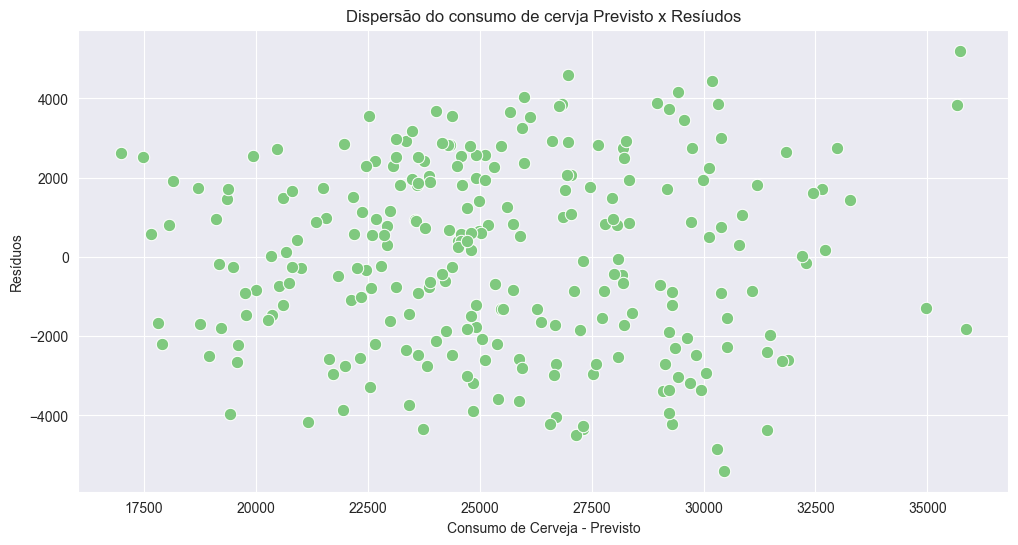

In [86]:
ax = sns.scatterplot(x=y_previstro_train, y = resíduos, s = 80)  # parâmetro s para aumentar as bolinhas
ax.set_xlabel('Consumo de Cerveja - Previsto')
ax.set_ylabel('Resíduos')
ax.set_title('Dispersão do consumo de cervja Previsto x Resíudos')
ax.figure.set_size_inches(12,6)

## Média ser 0 é um bom sinal, porém a medida que o y previsto aumenta as bolinhas vao se afastando demais. 
# No ínicio começa entre -4k e 4k e depois sai desse range.

## Utilizando os resíduos ao quadrado

<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

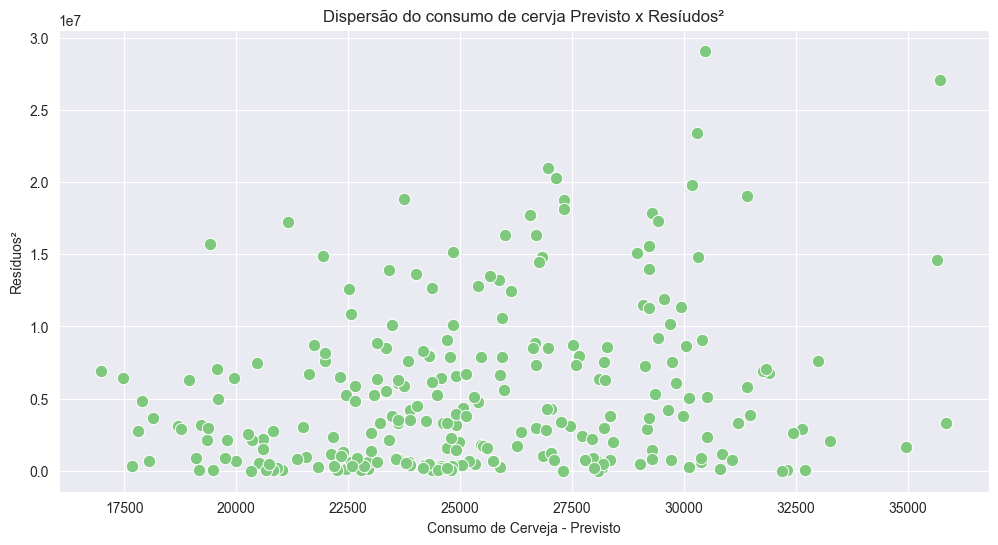

In [87]:
ax = sns.scatterplot(x=y_previstro_train, y = resíduos**2, s = 80)  # parâmetro s para aumentar as bolinhas
ax.set_xlabel('Consumo de Cerveja - Previsto')
ax.set_ylabel('Resíduos²')
ax.set_title('Dispersão do consumo de cervja Previsto x Resíudos²')
ax.figure.set_size_inches(12,6)

## Parece mais o segundo gráfico do que o primeiro. Isso pois minha amostra é pequena (n=365)

## Plotando a distribuição de frequências dos resíduos

Text(0.5, 1.0, 'Distribuição de Frequências dos Resíduos')

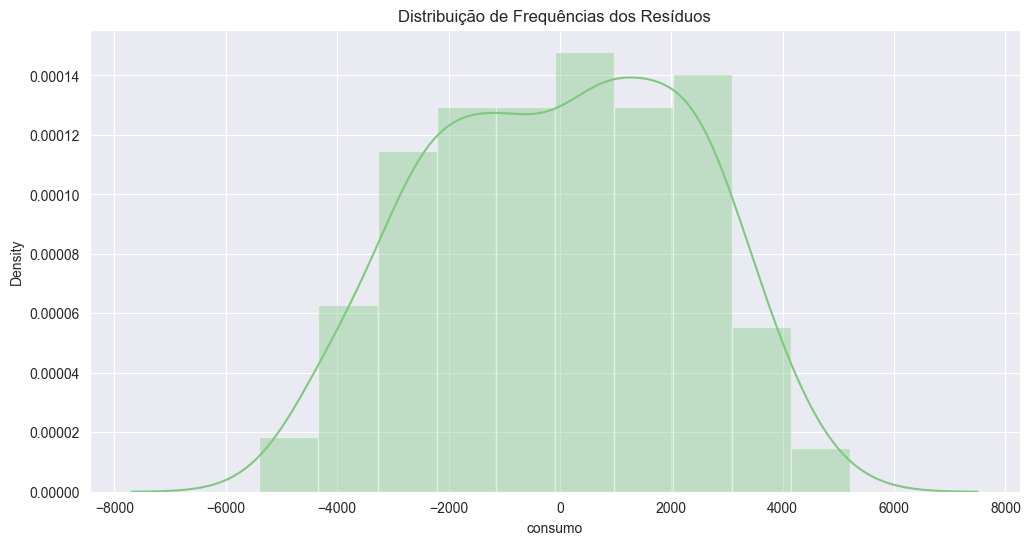

In [88]:
ax = sns.distplot(resíduos)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências dos Resíduos')

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [89]:
X2 = dados[['temp_media','chuva','fds']]

## Criando os datasets de treino e de teste

In [90]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [91]:
modelo2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [92]:
modelo2.fit(X2_train,y2_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [95]:
modelo2.score(X2_train,y2_train)

0.6617640611940382

In [96]:
modelo.score(X_train,y_train)

##Como o r² cai para o modelo 2 usando a temperatura média, não é melhor.

0.7336167014928967

## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [98]:
y2_previsto = modelo2.predict(X2_test)
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [100]:
metrics.r2_score(y2_test,y2_previsto)

0.6574588953371101

In [101]:
metrics.r2_score(y_test,y_previsto)

## Para o teste, o modelo com a temperatura máxima explica mais que o modelo com temperatura média.

0.690736466775069

# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [115]:
## Quanto menor o erro, melhor

EQM2 = metrics.mean_squared_error(y2_test,y2_previsto)
R_EQM2 = np.sqrt(metrics.mean_squared_error(y2_test,y2_previsto))

R2_2 = metrics.r2_score(y2_test,y2_previsto)

df = pd.DataFrame([EQM2, R_EQM2, R2_2], ['EQM', 'REQM', 'R²'], columns= ['Métricas Modelo Temperatura Média'])
df

,Métricas Modelo Temperatura Média
EQM,6.060775e+06
REQM,2.461864e+03
R²,6.574589e-01


## Obtendo métricas para o modelo com Temperatura Máxima

In [116]:
## Quanto menor o erro, melhor

EQM = metrics.mean_squared_error(y_test,y_previsto)
R_EQM = np.sqrt(metrics.mean_squared_error(y_test,y_previsto))  ## em litros

R2 = metrics.r2_score(y_test,y_previsto)

df ['Métricas Modelo Temperatura Máxima'] = [EQM, R_EQM, R2]
df
## O R² aumenta conforme eu vou aumentando o número de variáveis explicativas. Então, a métrica dos ERROS é melhor para avaliar modelos com diferentes números de variáveis.

,Métricas Modelo Temperatura Média,Métricas Modelo Temperatura Máxima
EQM,6.060775e+06,5.471976e+06
REQM,2.461864e+03,2.339226e+03
R²,6.574589e-01,6.907365e-01


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [117]:
import pickle

In [118]:
output = open('modelo_consumo_cerveja', 'wb') ##método wisebinner ?
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```